# 2.0 Toxin Expusure Experiment

## Activate project

In [1]:
using DrWatson
@quickactivate :CellFilamentation

## Differential equation algorithms

In [2]:
choice_function(integrator) = (Int(integrator.dt < 0.001) + 1)
alg_switch = CompositeAlgorithm((Tsit5(), Vern7()), choice_function);

## Initialize an Cell structure

In [3]:
cell = Cell(max_height=4.0)

Cell{Float64}
  side_length: Float64 0.6
  radius: Float64 0.2
  internal_toxin: Float64 0.0
  toxin_diffusion_rate: Float64 0.3
  antitoxin: Float64 0.0
  antitoxin_efficacy: Float64 0.0
  filamentation_rate: Float64 0.1
  filamentation_threshold: Float64 0.5
  kill_threshold: Float64 1.0
  max_height: Float64 4.0
  noise_int_toxin: Float64 0.1
  noise_height: Float64 0.0
  τ_filamentation: Float64 Inf
  τ_kill: Float64 Inf
  τ_delay: Float64 0.0
  state: Symbol Normal


## Establish parameters

In [4]:
amount_toxins = collect(0.0:0.1:3.0)
exposure_times = collect(0:1.0:100);

## Run experiment

In [5]:
ordinary_df = toxin_exposure_experiment(cell, amount_toxins, exposure_times, 100, true, 1, true);

## Process experiment


Find the differences between control and filamentation experiments

In [6]:
tmp_df = ordinary_df |>
    x->@where(x, :state .== Symbol("Dead")) |>
    x->groupby(x, [:exposure_time, :experiment]) |>
    x->combine(y->y[y.amount_toxin .== minimum(y.amount_toxin), :], x) |>
    x->@orderby(x, :exposure_time, :experiment);

a, b = [subdf[!, [:exposure_time, :amount_toxin]] for subdf in groupby(tmp_df, :experiment)];
a = a[argmax(a[!, :exposure_time] .≥ b[!, :exposure_time][1]):end, :]
c = DataFrame(exposure_time=b[!, :exposure_time], tolerance=b[!, :amount_toxin] - a[!, :amount_toxin]);

## Plot experiment


### Heatmaps


In [7]:
p1 = plot_toxin_exposure_experiment(ordinary_df);

### Diffence between experimentes


In [8]:
ll = @vlplot(
    data=c,
    width=625,
    height=200,
    #transform = [filter = {field="exposure_time", range=[0, 20]}],
    mark={
        :area,
        clip=true,
        line={color=:darkgreen},
        color = {
            x1=1, y1=1, x2=1, y2=0,
            gradient="linear",
            stops = [{offset=0, color=:white}, {offset=1, color=:darkgreen}]
        }
    },
    x={"exposure_time:q", title="Exposure time"},
    y={"tolerance:q", title="Increased resistance"},
    
);

### Main figure


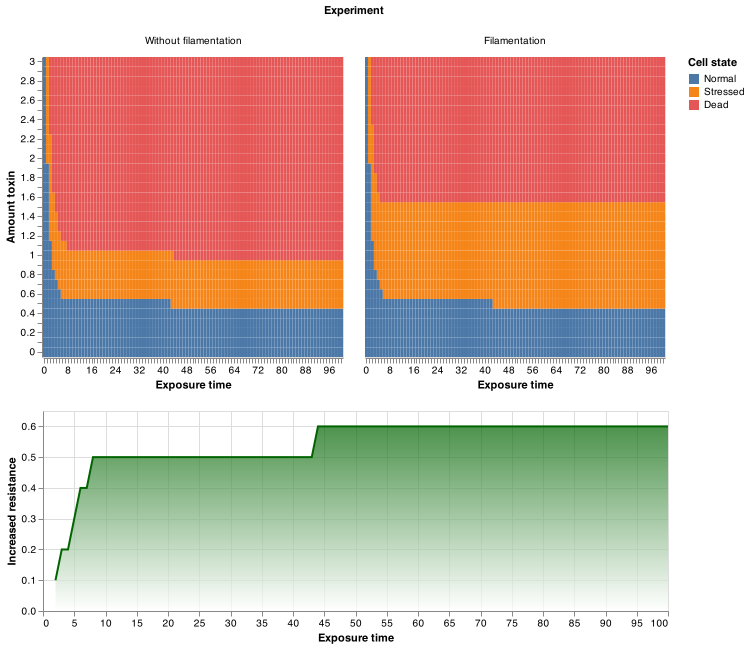

In [9]:
incresed_time_resistence_plot = vcat(p1, ll)

In [10]:
save(plotsdir("incresed_time-resistence_plot.png"), incresed_time_resistence_plot)
save(plotsdir("incresed_time-resistence_plot.svg"), incresed_time_resistence_plot)